# Remove 60 Hz interference without filtering

In [1]:
from pyestimate import sin_param_estimate
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

Generate signal with interference for simulation

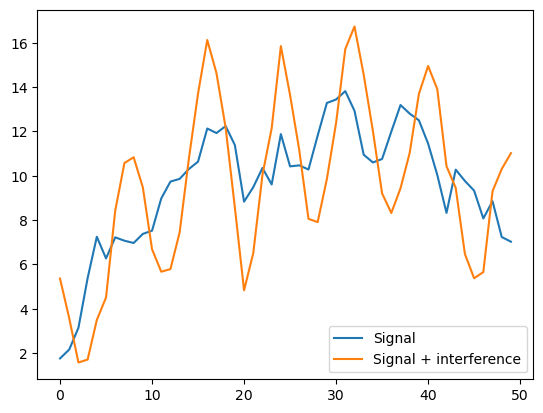

In [2]:
Fs = 500 # sampling frequency
Fi = 60*1.01 # Interferer frequency, known with an error of 1%. Small errors are tolerated. If error gets larger, estimation of the frequency is also required 
N = 50 # number of samples
n = np.arange(N)
i = 4*np.cos(2*np.pi*Fi/Fs*n + np.pi/7)
s = np.cumsum(np.random.normal(scale=1, size=N)) # signal
x = s + i # signal + interferer

plt.plot(n, s, label='Signal')
plt.plot(n, x, label='Signal + interference')
plt.legend()
plt.show()

Estimate amplitude and phase of interferer

In [3]:
A_hat, f_hat, phi_hat = sin_param_estimate(x, freq=60/Fs) # We assume here the frequency is known to be ~60 Hz

Subtract estimated interferer from data and plot result

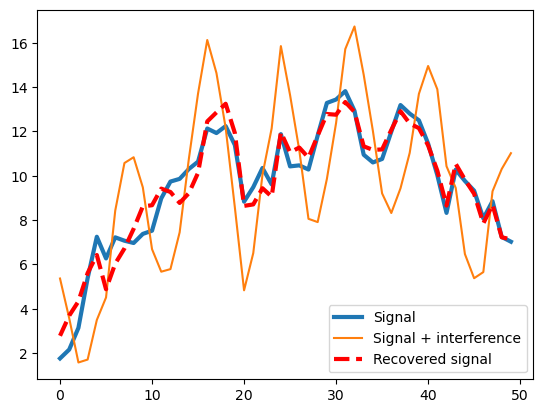

In [4]:
s_hat = x - A_hat * np.cos(2*np.pi*f_hat*n + phi_hat)

plt.plot(n, s, label='Signal', linewidth=3.0)
plt.plot(n, x, label='Signal + interference')
plt.plot(n, s_hat, 'r--', label='Recovered signal', linewidth=3.0)
plt.legend()